In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from random import seed
from random import sample
import copy
import itertools
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.weightstats import ztest
import math
from statsmodels.stats.weightstats import ztest as ztest

In [2]:
seed(4)
df = pd.read_csv('c3_test_data')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()


,Campus Number_1,Campus Number_2,Campus Number_3,Campus Number_4,Campus Number_5,Campus Number_6,Campus Number_7,Gender_Female,Gender_Male,EthnicityRace_African American,...,Military Connected Student_1,>=50.0% Remote SY 2020-21_No,>=50.0% Remote SY 2020-21_Yes,Oral Administration_No,Oral Administration_Yes,Test Admin Mode_Online,Test Admin Mode_Paper,Discipline Placement Incidents,STAAR Progress from 2019,target
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,-0.297161,-1.086340,1
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,1,0,1,0,-0.297161,-1.086340,1
2,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,-0.297161,0.190109,3
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,2.496151,-1.086340,0
4,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,-0.297161,0.190109,3


In [3]:
df.shape

(85, 47)

In [4]:
def randsam(num, amount):
    bs_array = np.empty([amount, num])
    for i in range(amount):
        bs_array[i] = np.random.choice(df.index, size=num)
    return(bs_array)

In [5]:
#Generating i randomly generated districts containing j classrooms of 20 students each
districts = {}
for i in range(1000):
    district = []
    
    for j in range(25):
        clsindex = np.random.choice(85, 20)
        cls = df.iloc[clsindex]
        district.append(cls)
    districts[i] = district
        

In [6]:
type(districts[0][0])
    

pandas.core.frame.DataFrame

In [7]:
beforepass = []
beforeavg = []
for district in districts:
    dbeforepass = []
    dbeforeavg = []
    for cls in districts[district]:
        cls['poor'] = sum(cls['Economic Disadvantage_Yes'])
        cls['sped'] = sum(cls['Special Ed_Yes'])
        cls['handicap'] = cls['poor'] + cls['sped']
        cls['resource'] = 0
        conditions = [
        (cls['target'] > 1),
        (cls['target'] < 1),
        (cls['target'] == 1)]
        values = [1, 0, 0]
        cls['pass'] = np.select(conditions, values)
        #cls.drop(columns=['poor', 'sped'])
        pass1 = sum(cls['pass'])
        avgtarget = cls['target'].mean()
        dbeforeavg.append(avgtarget)
        dbeforepass.append(pass1)
    beforepass.append(mean(dbeforepass))
    beforeavg.append(mean(dbeforeavg))

C:\Users\ARMSTR~1\AppData\Local\Temp/ipykernel_6516/35514146.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls['poor'] = sum(cls['Economic Disadvantage_Yes'])
C:\Users\ARMSTR~1\AppData\Local\Temp/ipykernel_6516/35514146.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls['sped'] = sum(cls['Special Ed_Yes'])
C:\Users\ARMSTR~1\AppData\Local\Temp/ipykernel_6516/35514146.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [8]:
mean(beforepass)

8.43752

In [9]:
beforepass[:5]

[9.56, 8.12, 8.28, 8.6, 8.64]

In [10]:
districts2 = copy.deepcopy(districts)
#districts2[0][0]['canary'] = True
#districts[0][0]

In [11]:
print("The experiment called: districts2 is a " + str(type(districts2)))
print("Each districts within the experiment is a " + str(type(districts2[0])))
print("Each class within the district is a " + str(type(districts2[0][0])))

The experiment called: districts2 is a <class 'dict'>
Each districts within the experiment is a <class 'list'>
Each class within the district is a <class 'pandas.core.frame.DataFrame'>


In [12]:
"""#Assigning resources within each district to the classes with the top 20% proportion of poor/sped
#poor student = 1 point
#sped student = 1 point
#poor/sped student = 2 points
for i in range(len(districts2)):
    for clsind in range(1,len(districts2[i])):
        #Now I want to sort the classes
        key_item = districts2[i][clsind].iloc[3]['handicap']
        pkey_item = districts2[i][clsind-1].iloc[3]['handicap']
        fixj = int(clsind-1)
        while fixj >= 0 and pkey_item > key_item:
            districts2[i][clsind]
            districts2[i][j + 1] = districts2[i][j]
            #j -= 1
        #districts2[i][j + 1] = key_item"""

"#Assigning resources within each district to the classes with the top 20% proportion of poor/sped\n#poor student = 1 point\n#sped student = 1 point\n#poor/sped student = 2 points\nfor i in range(len(districts2)):\n    for clsind in range(1,len(districts2[i])):\n        #Now I want to sort the classes\n        key_item = districts2[i][clsind].iloc[3]['handicap']\n        pkey_item = districts2[i][clsind-1].iloc[3]['handicap']\n        fixj = int(clsind-1)\n        while fixj >= 0 and pkey_item > key_item:\n            districts2[i][clsind]\n            districts2[i][j + 1] = districts2[i][j]\n            #j -= 1\n        #districts2[i][j + 1] = key_item"

In [13]:
for dis in range(len(districts2)):
    for i in range(len(districts2[dis])):
        # Create a flag that will allow the function to
        # terminate early if there's nothing left to sort
        already_sorted = True

        # Start looking at each item of the list one by one,
        # comparing it with its adjacent value. With each
        # iteration, the portion of the array that you look at
        # shrinks because the remaining items have already been
        # sorted.
        for j in range(len(districts2[dis]) - i - 1):
            if districts2[dis][j].iloc[3]['handicap'] > districts2[dis][j + 1].iloc[3]['handicap']:
                # If the item you're looking at is greater than its
                # adjacent value, then swap them
                districts2[dis][j], districts2[dis][j + 1] = districts2[dis][j + 1], districts2[dis][j]

                # Since you had to swap two elements,
                # set the `already_sorted` flag to `False` so the
                # algorithm doesn't finish prematurely
                already_sorted = False

        # If there were no swaps during the last iteration,
        # the array is already sorted, and you can terminate
        if already_sorted:
            break
#Sorting Algorithm adapted from https://realpython.com/sorting-algorithms-python/

In [14]:
for cls in districts2[0]:
    print(cls.iloc[3]['handicap'])

11.0
12.0
13.0
13.0
13.0
13.0
14.0
14.0
14.0
14.0
14.0
15.0
15.0
16.0
16.0
16.0
16.0
17.0
18.0
18.0
19.0
19.0
20.0
20.0
21.0


In [15]:
#OMG It's sorted! Deliverying resources to the groups with the highest number of handicap
for dis in districts2:
    for cls in districts2[dis]:
        cls['resource'] = 0
    for cls in districts2[dis][-5:]:
        cls['resource'] += 1

In [16]:
#Improving the test scores of 20% of the students in classes that recieve extra resources
for i in range(len(districts2)):
    for cls in districts2[i]:
        cls.reset_index(inplace=True, drop=True)
        if cls['resource'].sum() == 0:
            continue
        else: 
            clsupdate = cls.sample(n=5)
            clsupdate['target'] +=1
            cls.update(clsupdate)

In [17]:
#Updating the new passing rate after updating scores
for i in range(len(districts2)):
    for cls in districts2[i]:
        conditions = [
        (cls['target'] > 1),
        (cls['target'] < 1),
        (cls['target'] == 1)]
        values = [1, 0, 0]
        cls['pass'] = np.select(conditions, values)

In [18]:
#Counting the new average test scores and new amount passing
afterpass = []
afteravg = []
for i in range(len(districts2)):
    dnavgtarget = []
    dnpass = []
    for cls in districts2[i]:
        navgtarget = cls['target'].mean()
        dnavgtarget.append(navgtarget)
        npass = cls['pass'].sum()
        dnpass.append(npass)
    afterpass.append(np.mean(dnpass))
    afteravg.append(np.mean(dnavgtarget))

In [19]:
print(np.mean(beforepass))
print(np.mean(beforeavg))
print(np.mean(afterpass))
print(np.mean(afteravg))

8.437520000000001
1.3606399999999998
8.718039999999998
1.41064


Ok Great. Just as expected we're seeing a modest improvement to both the average test scores and the number of students passing.

My expectation is that by using machine learning to direct resources to classes with the highest number of predicted "approaching" students will not improve the average target any more than the current approach. The assumption here is that the extra math resources will have an equal impact on any students they are applied to.

However I do expect that by using machine learning to direct resources to classrooms with the highest number of predicted "approaching" students we should get a higher average number of students who pass the STAAR.

Note: This method provides an 4% increase in the average staar scores but only a 3% increase in the number of passing students

In [20]:
passincrease = (mean(afterpass) - mean(beforepass))/mean(beforepass)
targetincrease = (mean(afteravg) - mean(beforeavg))/mean(beforeavg)
print("With the old method the passrate increased by " + str(round(passincrease, 2)))
print("With the old method the target increased by " + str(round(targetincrease, 2)))

With the old method the passrate increased by 0.03
With the old method the target increased by 0.04


In [21]:
#Now I am going to use the RandomForest model to predict scores and assign resources to the classes with the highest number of 
#"approaching" students
#importing training data
X_train = pd.read_csv('c3_sim_x.csv')
y_train = pd.read_csv('c3_sim_y.csv')

In [22]:
clf = RandomForestClassifier(n_estimators=1000, min_samples_split = 10, min_samples_leaf = 2, max_features = 'sqrt', \
                            max_depth = 10, bootstrap = True)
model = clf.fit(X_train.drop(columns=['Unnamed: 0']), y_train)

In [23]:
len(X_train.columns)

47

In [24]:
len(df.columns)

47

In [25]:
df2 = df
y_pred = model.predict(df2.drop(columns=['target']))

In [26]:
preds = []
for i in y_pred:
    preds.append(i[1])

In [27]:
df2['pred'] = preds
df2['target'] = df['target']

In [28]:
#Generating i randomly generated districts containing j classrooms of 20 students each
districtsml = {}
for i in range(1000):
    district = []
    
    for j in range(25):
        clsindex = np.random.choice(85, 20)
        cls = df2.iloc[clsindex]
        district.append(cls)
    districtsml[i] = district

In [29]:
#Counting the number of approaching students in each classroom
for i in range(len(districtsml)):
    for cls in districtsml[i]:
        conditions = [
        (cls['pred'] > 1),
        (cls['pred'] < 1),
        (cls['pred'] == 1)]
        values = [0, 0, 1]
        cls['approach'] = np.select(conditions, values)

C:\Users\ARMSTR~1\AppData\Local\Temp/ipykernel_6516/2989145491.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls['approach'] = np.select(conditions, values)


In [30]:
for i in range(len(districtsml)):
    for cls in districtsml[i]:
        cls['sum'] = cls['approach'].sum()

C:\Users\ARMSTR~1\AppData\Local\Temp/ipykernel_6516/1548356332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls['sum'] = cls['approach'].sum()


In [31]:
beforepassml = []
beforeavgml = []
for district in districtsml:
    dbeforepassml = []
    dbeforeavgml = []
    for cls in districtsml[district]:
        conditions = [
        (cls['target'] > 1),
        (cls['target'] < 1),
        (cls['target'] == 1)]
        values = [1, 0, 0]
        cls['pass'] = np.select(conditions, values)
        #cls.drop(columns=['poor', 'sped'])
        pass1ml = sum(cls['pass'])
        avgtargetml = cls['target'].mean()
        dbeforeavgml.append(avgtargetml)
        dbeforepassml.append(pass1ml)
    beforepassml.append(mean(dbeforepassml))
    beforeavgml.append(mean(dbeforeavgml))

C:\Users\ARMSTR~1\AppData\Local\Temp/ipykernel_6516/850371655.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls['pass'] = np.select(conditions, values)


In [32]:
mean(beforepassml)

8.48056

In [33]:
mean(beforepass)

8.43752

In [34]:
#Sorting by classes with most level 1s
for dis in range(len(districtsml)):
    for i in range(len(districtsml[dis])):
        # Create a flag that will allow the function to
        # terminate early if there's nothing left to sort
        already_sorted = True

        # Start looking at each item of the list one by one,
        # comparing it with its adjacent value. With each
        # iteration, the portion of the array that you look at
        # shrinks because the remaining items have already been
        # sorted.
        for j in range(len(districtsml[dis]) - i - 1):
            if districtsml[dis][j].iloc[3]['sum'] > districtsml[dis][j + 1].iloc[3]['sum']:
                # If the item you're looking at is greater than its
                # adjacent value, then swap them
                districtsml[dis][j], districtsml[dis][j + 1] = districtsml[dis][j + 1], districtsml[dis][j]

                # Since you had to swap two elements,
                # set the `already_sorted` flag to `False` so the
                # algorithm doesn't finish prematurely
                already_sorted = False

        # If there were no swaps during the last iteration,
        # the array is already sorted, and you can terminate
        if already_sorted:
            break

In [35]:
#Giving resource to classes with highest sum
for i in range(len(districtsml)):
    for cls in districtsml[i]:
        cls['resource'] = 0
    for cls in districtsml[i][-5:]:
        cls['resource']+=1

C:\Users\ARMSTR~1\AppData\Local\Temp/ipykernel_6516/3195068291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls['resource'] = 0
C:\Users\ARMSTR~1\AppData\Local\Temp/ipykernel_6516/3195068291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cls['resource']+=1


In [36]:
#improving the scores of 20% of the students who recieve the math resource
districtsml2 = copy.deepcopy(districtsml)
for i in range(len(districtsml2)):
    for cls in districtsml2[i]:
        cls.reset_index(inplace=True, drop=True)
        if cls['resource'].sum() == 0:
            continue
        else: 
            clsupdate = cls.sample(n=5)
            clsupdate['target'] +=1
            cls.update(clsupdate)

In [37]:
#Recalculating passing students
for i in range(len(districtsml2)):
    for cls in districtsml2[i]:
        conditions = [
        (cls['target'] > 1),
        (cls['target'] < 1),
        (cls['target'] == 1)]
        values = [1, 0, 0]
        cls['pass'] = np.select(conditions, values)

In [38]:
afterpassml = []
afteravgml = []
for i in range(len(districtsml2)):
    dnavgtargetml = []
    dnpassml = []
    for cls in districtsml2[i]:
        navgtargetml = cls['target'].mean()
        dnavgtargetml.append(navgtargetml)
        npassml = cls['pass'].sum()
        dnpassml.append(npassml)
    afterpassml.append(np.mean(dnpassml))
    afteravgml.append(np.mean(dnavgtargetml))

In [39]:
print(mean(beforepassml))
print(mean(beforeavgml))
print(mean(afterpassml))
print(mean(afteravgml))

8.48056
1.365446
8.80496
1.415446


Now to compare how the machine learning method compared. 
Avg target increased by 4%
Passing growth went up to 4%

In [40]:
passincreaseml = (mean(afterpassml) - mean(beforepassml))/mean(beforepassml)
targetincreaseml = (mean(afteravgml) - mean(beforeavgml))/mean(beforeavgml)
print("With the new method the passrate increased by " + str(round(passincreaseml, 2)))
print("With the new method the target increased by " + str(round(targetincreaseml, 2)))

With the new method the passrate increased by 0.04
With the new method the target increased by 0.04


Now to determine the p-value that the difference is statistically significant. 
My hypothesis: The passrate increases at a higher rate on average for the new method than for the old method
Null hypothesis: The passrate increase for both samples have the same mean

In [41]:
#Generating increases for the each method
oldincreases = []
for i in range(len(beforepass)):
    answer = (afterpass[i]-beforepass[i])/beforepass[i]
    oldincreases.append(answer)
newincreases = []
for i in range(len(beforepassml)):
    answerml = (afterpassml[i]-beforepassml[i])/beforepassml[i]
    newincreases.append(answerml)

In [42]:
oldincreases[:5]

[0.03347280334728036,
 0.024630541871921315,
 0.02898550724637684,
 0.03255813953488385,
 0.041666666666666595]

In [43]:
newincreases[:5]

[0.07246376811594221,
 0.05263157894736858,
 0.04477611940298523,
 0.04545454545454529,
 0.052083333333333384]

In [44]:
def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2
def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
 
        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
 
    return perm_replicates
def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff
empirical_diff_means = diff_of_means(oldincreases, newincreases)
perm_replicates = draw_perm_reps(oldincreases, newincreases,
                                 diff_of_means, size=10000)
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
#Code above adapted from datacamp.com

In [45]:
print(p)

1.0


In [46]:
ztest(oldincreases, newincreases, value=mean(newincreases)-mean(oldincreases))

(-19.858450482142903, 9.314008270802703e-88)

In [47]:
8.782446492316547e-227 > 0

True

In [48]:
8.782446492316547e-227 > 0.05

False

From this I can determine that seeing this difference of means is statistically significant

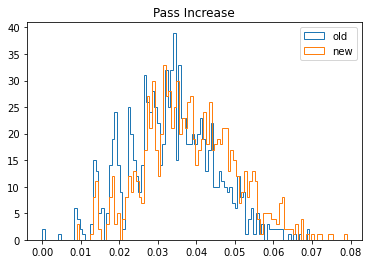

In [52]:
plt.hist(oldincreases, bins = 100, histtype = 'step')
plt.hist(newincreases, bins = 100, histtype = 'step')
_ = plt.legend(('old', 'new'))
_ = plt.title('Pass Increase')
plt.show()

In [50]:
targetincreaseold = []
for i in range(len(beforeavg)):
    answer = (afteravg[i]-beforeavg[i])/beforeavg[i]
    targetincreaseold.append(answer)
targetincreasenew = []
for i in range(len(beforeavgml)):
    answer = (afteravgml[i]-beforeavgml[i])/beforeavgml[i]
    targetincreasenew.append(answer)

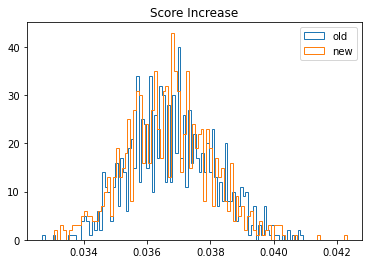

In [53]:
plt.hist(targetincreaseold, bins = 100, histtype = 'step')
plt.hist(targetincreasenew, bins = 100, histtype = 'step')
_ = plt.legend(('old', 'new'))
_ = plt.title('Score Increase')
plt.show()